## Select_images_by_location

Use a lat/lon bounding box and image locations in the navigation files to copy a subset of images
to a target directory. Make a quick plot of the image locations copied.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from pathlib import Path
import pandas as pd
%matplotlib inline

In [14]:
### Target location and bounding box

In [15]:
# bounding coords for North Core Banks
latmin = 34.83
latmax = 35.09
lonmin = -76.31
lonmax = -76.02

### Location of navigation file

In [16]:
parent_dir = 'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights'
nav_files = ['2019_0830_ppk-photo-locations-mbase-GP161658.txt',\
             '2019_0830_ppk-photo-locations-mbase-GP192757.txt']

skiprows = [35, 35]
path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )

### Source and destination folders for imagery

Order of `nav_files` and `src_dirs` must correspond.

In [34]:
src_dirs = ['H:\\data\\HxDorian_2019\\pre-storm\\images\\jpgs\\flight1-0830',\
            'H:\\data\\HxDorian_2019\\pre-storm\\images\\jpgs\\flight2-0830']
dest_dir = ['D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-08_OBX\\2019-08-30_CoreBx_images\\flight1-0830',\
            'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-08_OBX\\2019-08-30_CoreBx_images\\flight2-0830']

In [18]:
### Pick which `nav_file` and `src_dirs` pair you want to use.

In [40]:
n=0
print('Navigation file : {}'.format(path[n]))
print('Source directory: {}'.format(src_dirs[n]))
print('Dest. directory: {}'.format(dest_dir[n]))

Navigation file : D:\crs\proj\2019_DorianOBX\WayneWright_flights\2019_0830_ppk-photo-locations-mbase-GP161658.txt
Source directory: H:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830
Dest. directory: D:\crs\proj\2019_DorianOBX\WayneWright_flights\2019-08_OBX\2019-08-30_CoreBx_images\flight1-0830


In [41]:
df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                         'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
df.describe()

,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCSeconds
count,8074.000000,8.074000e+03,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000
mean,409995.893444,3.882685e+06,311.304005,35.082411,-75.986090,273.026786,1.092643,0.024662,0.015226,495536.944096
std,32836.114592,3.347492e+04,8.706483,0.304478,0.356869,8.773168,0.320392,0.033849,0.018192,2718.106582
min,358997.767000,3.825794e+06,270.948000,34.564455,-76.537107,232.665000,1.000000,0.016000,0.010000,491041.031000
25%,379721.636000,3.857782e+06,305.874000,34.855261,-76.315727,267.509000,1.000000,0.019000,0.012000,493241.293000
50%,409438.819500,3.881990e+06,311.042500,35.076599,-75.993359,272.817500,1.000000,0.021000,0.013000,495473.550500
75%,443321.448000,3.898096e+06,316.761750,35.224393,-75.622877,278.548250,1.000000,0.025000,0.015000,497708.779000
max,458324.543000,3.974221e+06,353.934000,35.910827,-75.459958,315.267000,4.000000,1.904000,0.999000,500433.025000


### Find images inside the bounding box and put them in a new, smaller dataframe called `dfs`

In [42]:
dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
print("Found {} images.".format(len(dfs)))

Found 1847 images.


### Copy the images to the destination directory (which must already exist)

In [43]:
icount = 0
for filename in dfs['image_name']:
    s = os.path.join(src_dirs[n], filename )
    d = os.path.join(dest_dir[n], filename )
    try:
        shutil.copyfile( s, d )
    except:
        icount = icount + 1
        print( os.path.join(src_dirs[n], filename) +' is missing.')
        
print("missing {} of {}".format(icount,len(dfs)))

missing 0 of 1847


### Make a simple plot

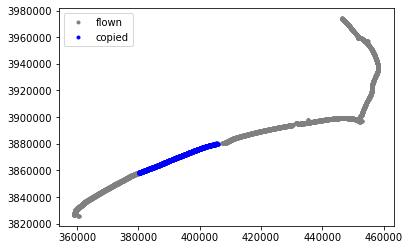

In [44]:
easting = df['easting'].values
northing = df['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='copied')
plt.legend()
plt.show()